# 第12章 さまざまな教師あり学習：分類

準備として、matplotlibで日本語を表示するためのライブラリを読み込みます

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

## ロジスティック回帰

**問1**  
ロジスティック回帰に関する以下のプログラムを実装してください

(1)  
iris.csvの「種類」を予測するモデルを作成してください。  
また、訓練データの正解率、検証データでの正解率を表示してください。

以下の要件を満たすように実装してください。
* ロジスティック回帰を使用する。正則化項の定数は0.1とする。
* 欠損値は各列の平均値で穴埋めする
* 特徴量のみ標準化する
* 訓練データと検証データに分割する。検証データは20%とする。

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ファイルの読み込み
df = pd.read_csv('iris.csv')

# 欠損値の穴埋め
df_fillna = df.fillna(df.mean())

# 特徴量と正解データに分割
# X = train2.loc[:, :'花弁幅']
X = df_fillna[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
y = df_fillna['種類']


# 特徴量の標準化
# スケーラーを生成する
sc_model_x = StandardScaler()

# スケーラーに特徴量の情報を与え、標準化まで一気に行う
# sc_X = scaler_X.fit_transform(X)
sc_model_x.fit(X)
sc_X = sc_model_x.transform(X)

# 訓練データと検証用データに分割する
X_train, X_val, y_train, y_val = train_test_split(sc_X, y, test_size = 0.2, random_state = 0)

# ロジスティック回帰のモデルを生成する
model = LogisticRegression(C = 0.1,random_state=0, multi_class = 'auto', solver='lbfgs')

# モデルに訓練データを学習させる
model.fit(X_train, y_train)

# 正解率の表示
print('訓練データの正解率{}'.format(model.score(X_train, y_train)))
print('検証データの正解率{}'.format(model.score(X_val, y_val)))

訓練データの正解率0.8666666666666667
検証データの正解率0.8333333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


▶実行結果(値は異なることがあります)  
訓練データの正解率: 0.8666666666666667  
検証データの正解率: 0.8333333333333334  

参考箇所
* 12-2～12-6

(2)  
上記モデルに、以下の表のデータで予測させた結果と、確率の予測結果を表示してください  
注意：予測させる特徴量も標準化が必要です。

|がく片長さ | がく片幅 | 花弁長さ | 花弁幅 |
|---: | ---: |---: |---: |
| 0.6 | 0.45 | 0.63 | 0.79|

In [ ]:
predict_data = pd.DataFrame([[0.6, 0.45, 0.63, 0.79]])

sc_predict = sc_model_x.transform(predict_data)
print('予測結果:{}'.format(model.predict(sc_predict)))
print('確率の予測結果:{}'.format(model.predict_proba(sc_predict)))

予測結果:['Iris-virginica']
確率の予測結果:[[0.02161425 0.25926649 0.71911927]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


▶実行結果(値は異なることがあります)    
予測結果: ['Iris-virginica']  
確率の予測結果: [[0.02161425 0.25926649 0.71911927]]  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"

参考箇所
* 12-8

(3)  
上記モデルの係数、切片を確認してください

In [ ]:
print('係数:{}'.format(model.coef_))
print('切片:{}'.format(model.intercept_))

係数:[[-0.53209541  0.48584036 -0.52629135 -0.83192326]
 [ 0.09494378 -0.44720771 -0.00110969 -0.04413366]
 [ 0.43715163 -0.03863265  0.52740105  0.87605692]]
切片:[-0.34434407  0.48688238 -0.14253831]


▶実行結果(値は異なることがあります)  
係数: [[-0.53209541  0.48584036 -0.52629135 -0.83192326]  
 [ 0.09494378 -0.44720771 -0.00110969 -0.04413366]  
 [ 0.43715163 -0.03863265  0.52740105  0.87605692]]  
切片: [-0.34434407  0.48688238 -0.14253831]

参考箇所
* 12-7、12-9

(4)*  
上記で正則化項の定数の値を0.1～0.5まで0.1ずつ変えていき、正解率を確認してください。

In [ ]:
for c in range(1, 6):
  c /= 10
  # ロジスティック回帰のモデルを生成する
  model = LogisticRegression(C = c, random_state=0, multi_class = 'auto', solver='lbfgs')

  # モデルに訓練データを学習させる
  model.fit(X_train, y_train)

  # 正解率の表示
  print('=== 正則化項の定数:', c)
  print('訓練データの正解率{}'.format(model.score(X_train, y_train)))
  print('検証データの正解率{}'.format(model.score(X_val, y_val)))

=== 正則化項の定数: 0.1
訓練データの正解率0.8666666666666667
検証データの正解率0.8333333333333334
=== 正則化項の定数: 0.2
訓練データの正解率0.9083333333333333
検証データの正解率0.9
=== 正則化項の定数: 0.3
訓練データの正解率0.9083333333333333
検証データの正解率0.9
=== 正則化項の定数: 0.4
訓練データの正解率0.9166666666666666
検証データの正解率0.9
=== 正則化項の定数: 0.5
訓練データの正解率0.9166666666666666
検証データの正解率0.8666666666666667


▶実行結果(値は異なることがあります)  
=== 正則化項の定数: 0.1  
訓練データの正解率: 0.8666666666666667  
検証データの正解率: 0.8333333333333334  
=== 正則化項の定数: 0.2  
訓練データの正解率: 0.9083333333333333  
検証データの正解率: 0.9  
=== 正則化項の定数: 0.3  
訓練データの正解率: 0.9083333333333333  
検証データの正解率: 0.9  
=== 正則化項の定数: 0.4  
訓練データの正解率: 0.9166666666666666  
検証データの正解率: 0.9  
=== 正則化項の定数: 0.5  
訓練データの正解率: 0.9166666666666666  
検証データの正解率: 0.8666666666666667  

## ランダムフォレスト

**問2**  
ランダムフォレストに関する以下のプログラムを実装してください

(1)  
Survived.csvの「Survived」を予測するモデルを作成します。 
下記内容の前処理を実施してください。
* ファイルの読み込み
* 欠損値の穴埋め（コード12-12の内容で実装してください）
* 特徴量で使用する列は　'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'　と　'Sex'列をダミー変数化した'male'　とし、特徴量と正解データへの分割
* 訓練データとテストデータへの分割する。テストデータは20%とする。

また、訓練データの特徴量の先頭5行を表示してください。


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ファイルの読み込み
df = pd.read_csv('Survived.csv')

# 欠損値の穴埋め(コード12-12の通り)
jo1 = df['Pclass'] == 1
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 43

jo2= df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 35

jo1 = df['Pclass'] == 2
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 26

jo2 = df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 20

jo1 = df['Pclass'] == 3
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 43

jo2 = df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 35

# ダミー変数化
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
male = pd.get_dummies(df['Sex'], drop_first = True)


# 特徴量と正解データに分割
X = pd.concat([X, male], axis = 1)
y = df['Survived']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# 訓練データの特徴量の先頭5行を表示
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male
140,3,43.0,0,2,15.2458,0
439,2,31.0,0,0,10.5000,1
817,2,31.0,1,1,37.0042,1
378,3,20.0,0,0,4.0125,1
491,3,21.0,0,0,7.2500,1


▶実行結果  
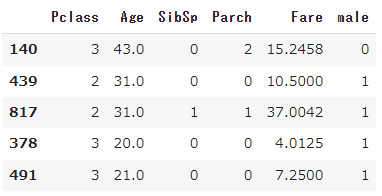

参考箇所
* 12-11～12-14

(2)  
ランダムフォレストモデルで学習させ、訓練データの正解率、テストデータでの正解率を表示してください。

以下の要件を満たすように実装してください。
* ランダムフォレストを使用する。作成する決定木の数は200とする。

In [ ]:
# ランダムフォレストのインポート
from sklearn.ensemble import RandomForestClassifier

# モデルを生成する
model = RandomForestClassifier(n_estimators = 200, random_state = 0)

# モデルに訓練データを学習させる
model.fit(X_train, y_train)

# 正解率の表示
print('訓練データの正解率:{}'.format(model.score(X_train, y_train)))
print('テストデータの正解率:{}'.format(model.score(X_test, y_test)))

訓練データの正解率:0.9887640449438202
テストデータの正解率:0.8715083798882681


▶実行結果(値は異なることがあります)  
訓練データの正解率: 0.9887640449438202  
テストデータの正解率: 0.8715083798882681

参考箇所
* 12-14、12-15

(3)  
上記モデルの特徴量重要度を、列と値を対応づけたシリーズにして表示してください

In [ ]:
pd.Series( model.feature_importances_, index = X_train.columns)

Pclass    0.079546
Age       0.323012
SibSp     0.045682
Parch     0.032854
Fare      0.265573
male      0.253334
dtype: float64

▶実行結果  
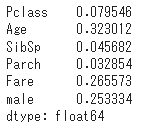

参考箇所
* 12-17

(4)  
通常の決定木でモデルを作成し、上記の訓練データ、テストデータでの正解率を表示してください

In [ ]:
# treeのインポート
from sklearn.tree import DecisionTreeClassifier

# 決定木のモデルをmodel2として生成する
model2 = DecisionTreeClassifier(random_state = 0)

# 訓練データで学習させる
model2.fit(X_train, y_train)

# 訓練データでの正解率とテストデータでの正解率を表示する
print('訓練データの正解率:{}'.format(model2.score(X_train, y_train)))
print('テストデータの正解率:{}'.format(model2.score(X_test, y_test)))

訓練データの正解率:0.9887640449438202
テストデータの正解率:0.8156424581005587


▶実行結果(値は異なることがあります)  
訓練データの正解率: 0.9887640449438202  
テストデータの正解率: 0.8156424581005587

ランダムフォレストの方がテストデータでの正解率が高い！

参考箇所
* 12-16

## アダブースト

**問1**  
アダブーストに関する以下のプログラムを実装してください

(1) ランダムフォレストの問1(1)と同じ内容です  
Survived.csvの「Survived」を予測するモデルを作成します。 
下記内容の前処理を実施してください。
* ファイルの読み込み
* 欠損値の穴埋め（コード12-12の内容で実装してください）
* 特徴量で使用する列は　'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'　と　'Sex'列をダミー変数化した'male'　とし、特徴量と正解データへの分割
* 訓練データとテストデータへの分割する。テストデータは20%とする。

また、訓練データの特徴量の先頭5行を表示してください。


In [ ]:
# ランダムフォレスト 問1(1)と同じ
import pandas as pd
from sklearn.model_selection import train_test_split

# ファイルの読み込み
df = pd.read_csv('Survived.csv')

# 欠損値の穴埋め(コード12-12の通り)
jo1 = df['Pclass'] == 1
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 43

jo2= df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 35

jo1 = df['Pclass'] == 2
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 26

jo2 = df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 20

jo1 = df['Pclass'] == 3
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 43

jo2 = df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 35

# ダミー変数化
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
male = pd.get_dummies(df['Sex'], drop_first = True)


# 特徴量と正解データに分割
X = pd.concat([X, male], axis = 1)
y = df['Survived']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# 訓練データの特徴量の先頭5行を表示
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male
140,3,43.0,0,2,15.2458,0
439,2,31.0,0,0,10.5000,1
817,2,31.0,1,1,37.0042,1
378,3,20.0,0,0,4.0125,1
491,3,21.0,0,0,7.2500,1


▶実行結果  
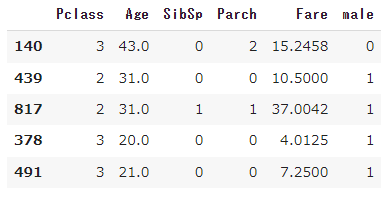

参考箇所
* 12-11～12-14

(2)  
アダブーストで学習させ、訓練データの正解率、テストデータでの正解率を表示してください。

以下の要件を満たすように実装してください。
* アダブーストを使用する。
 * 深さ5の決定木をベースモデルとする
 * ベースモデルを500個使う

In [ ]:
# アダブーストのインポート
from sklearn.ensemble import AdaBoostClassifier

# 決定木のインポート
from sklearn.tree import DecisionTreeClassifier

# ベースとするモデルの生成(今回は深さ5の決定木)
base_model = DecisionTreeClassifier(random_state = 0, max_depth = 5)

# アダブーストのオブジェクトを生成(ベースとするモデルを500個使う)
model = AdaBoostClassifier(n_estimators = 500, random_state = 0, base_estimator = base_model)

# 訓練データで学習させる
model.fit(X_train, y_train)

# 訓練データでの正解率とテストデータでの正解率を表示する
print('訓練データの正解率:{}'.format(model.score(X_train, y_train)))
print('テストデータの正解率:{}'.format(model.score(X_test, y_test)))

訓練データの正解率:0.9887640449438202
テストデータの正解率:0.8603351955307262


▶実行結果  
訓練データの正解率: 0.9887640449438202  
テストデータの正解率: 0.8156424581005587

参考箇所
* 12-16